# Evaluation and Visualization Regression

## Import libraries

In [1]:
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## Load model and data

In [2]:
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

with open('pca_data.pkl', 'rb') as f:
    pca_data = pickle.load(f)

X_raw = pca_data['X_raw']
y = pca_data['y']

## Split data into training and test sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.2, random_state=42)

## Train and test model

In [4]:
# Train the best model on the training set
print("\nTraining the Best Model on the Training Set...")
best_model.fit(X_train, y_train)

# Predict on the training set
y_train_pred = best_model.predict(X_train)

# Predict on the test set
y_test_pred = best_model.predict(X_test)

# Evaluate on training set
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
print(f"\nTraining Set Performance:")
print(f"Mean Squared Error: {train_mse:.2f}")
print(f"R^2 Score: {train_r2:.2f}")

# Evaluate on test set
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)
print(f"\nTest Set Performance:")
print(f"Mean Squared Error: {test_mse:.2f}")
print(f"R^2 Score: {test_r2:.2f}")


Training the Best Model on the Training Set...

Training Set Performance:
Mean Squared Error: 2872.79
R^2 Score: 0.53

Test Set Performance:
Mean Squared Error: 2884.62
R^2 Score: 0.46


## Plots

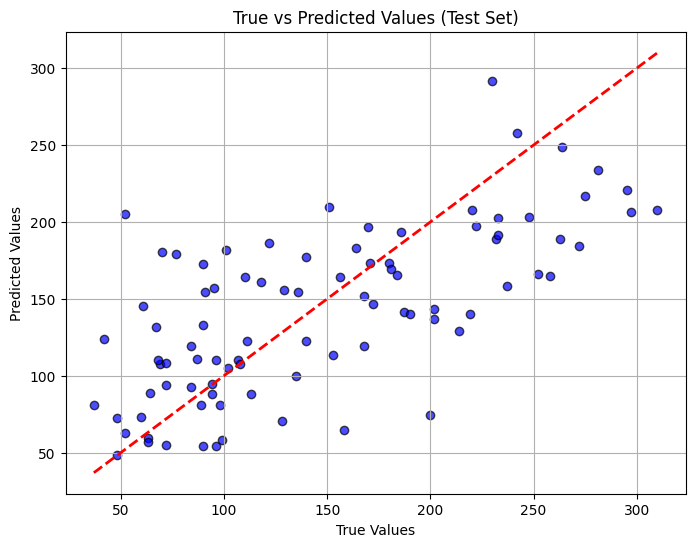

In [5]:
# Plot true vs predicted values for test set
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_test_pred, alpha=0.7, color='blue', edgecolor='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', lw=2)
plt.title('True vs Predicted Values (Test Set)')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.grid(True)
plt.show()

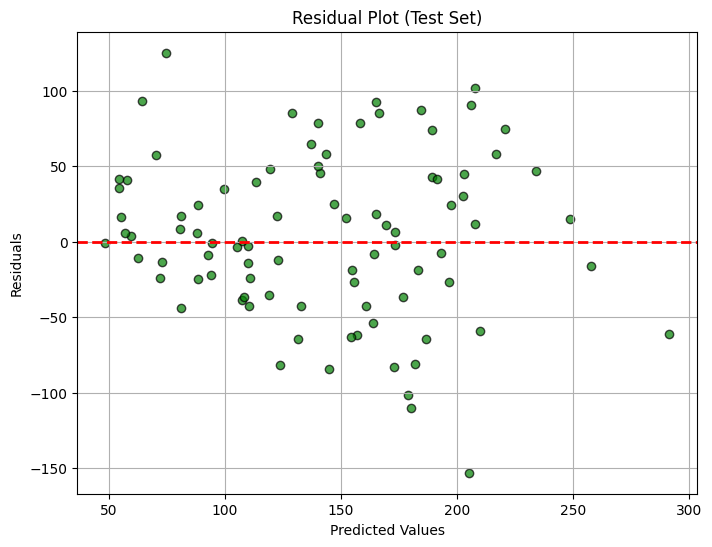

In [6]:
# Plot residuals for test set
residuals = y_test - y_test_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_test_pred, residuals, alpha=0.7, color='green', edgecolor='k')
plt.axhline(y=0, color='red', linestyle='--', lw=2)
plt.title('Residual Plot (Test Set)')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

In [7]:
# Feature importance (if applicable)
if hasattr(best_model.named_steps['regressor'], "feature_importances_"):
    feature_importances = best_model.named_steps['regressor'].feature_importances_
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(feature_importances)), feature_importances, color='skyblue', alpha=0.7)
    plt.title('Feature Importances')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.grid(True)
    plt.show()